In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
# read data, convert epoch to datetime
users = pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates=True)
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users.head()
users.shape

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


(12000, 10)

In [22]:
# make object_id the index, as this equates to user_id in the engagement data
users.set_index('object_id')

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN


In [35]:
users.dtypes

object_id                              int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [36]:
# convert creation_date to datetime
users.creation_time = pd.to_datetime(users.creation_time)
users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [38]:
users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,0.432742,0.356432,124.056723,3383.761968
min,1.00000,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000


Less than 25% of users opted into the mailing list and less than 15% of users opted in to the marketing drip.

In [21]:
# read data
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()
engagement.shape

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


(207917, 3)

In [23]:
engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [33]:
# convert time_stamp to datetime format
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [34]:
engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [47]:
# make time_stamp the index
engagement = engagement.set_index('time_stamp')
engagement.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [60]:
# look at logins over a rolling 7 day period
weekly_logins = engagement.groupby('user_id')['visited'].rolling('7D').count(); weekly_logins

user_id  time_stamp         
1        2014-04-22 03:53:30    1.0
2        2013-11-15 03:45:04    1.0
         2013-11-29 03:45:04    1.0
         2013-12-09 03:45:04    1.0
         2013-12-25 03:45:04    1.0
         2013-12-31 03:45:04    2.0
         2014-01-08 03:45:04    1.0
         2014-02-03 03:45:04    1.0
         2014-02-08 03:45:04    2.0
         2014-02-09 03:45:04    3.0
         2014-02-13 03:45:04    3.0
         2014-02-16 03:45:04    2.0
         2014-03-09 03:45:04    1.0
         2014-03-13 03:45:04    2.0
         2014-03-31 03:45:04    1.0
3        2013-03-19 23:14:52    1.0
4        2013-05-22 08:09:28    1.0
5        2013-01-22 10:14:20    1.0
6        2013-12-19 03:37:06    1.0
7        2012-12-20 13:24:32    1.0
10       2013-01-16 22:08:03    1.0
         2013-01-22 22:08:03    2.0
         2013-01-30 22:08:03    1.0
         2013-02-04 22:08:03    2.0
         2013-02-06 22:08:03    2.0
         2013-02-14 22:08:03    1.0
         2013-02-17 22:08:03    2.0

In [66]:
# identify users with 3 or more logins over the rolling 7 day period
adopted_users = weekly_logins.groupby('user_id').max() > 2
adopted_users.head()

user_id
1    False
2     True
3    False
4    False
5    False
Name: visited, dtype: bool

In [67]:
# join adopted_users to users
users = users.join(adopted_users)

In [68]:
users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,NaN


In [69]:
# change NaN values in visited to False and in invited users to 0 (as this will not match any existing user)
users.loc[users.visited.isnull(), 'visited'] = False
users.loc[users.invited_by_user_id.isnull(), 'invited_by_user_id'] = 0

In [76]:
print('{:.2f}% of users adopted.'.format((sum(users.visited) * 100)/(len(users.visited))))

13.35% of users adopted.


In [71]:
len(users.visited)

12000

In [79]:
# drop name and email columns, as these will not help predict anything
users = users.drop(['name','email'], axis=1)

In [163]:
a = users.copy()
a = a.drop(['creation_time','last_session_creation_time'], axis=1)

In [164]:
a = pd.concat([a, pd.get_dummies(a['org_id'],prefix = 'org_id_')], axis=1)
a = pd.concat([a, pd.get_dummies(a['creation_source'], prefix = 'creation_source_')], axis=1)
a = a.drop(['org_id','creation_source'], axis=1)
a.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,visited,org_id__0,org_id__1,org_id__2,org_id__3,org_id__4,...,org_id__412,org_id__413,org_id__414,org_id__415,org_id__416,creation_source__GUEST_INVITE,creation_source__ORG_INVITE,creation_source__PERSONAL_PROJECTS,creation_source__SIGNUP,creation_source__SIGNUP_GOOGLE_AUTH
0,1,1,0,10803.0,False,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,316.0,False,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,0,1525.0,True,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,0,5151.0,False,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,5240.0,False,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.formula.api as sm

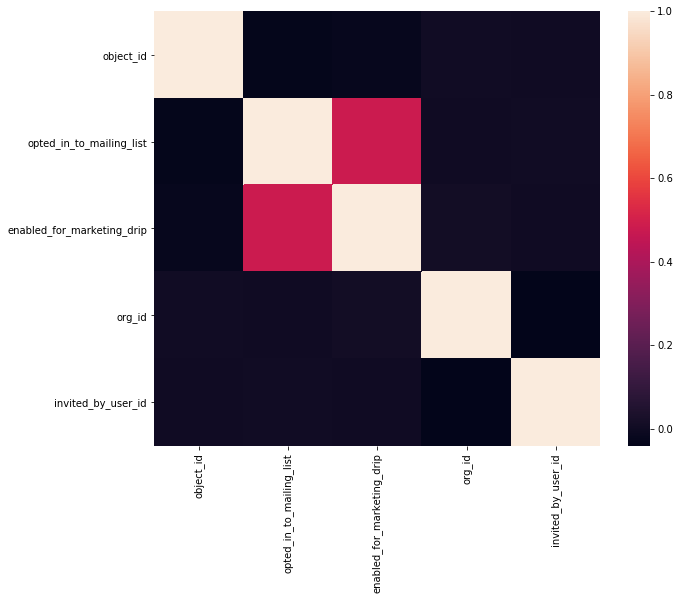

In [86]:
import seaborn as sns
corr = users.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The only variables that appear remotely correlated are 'opted_in_to_mailing_list' and 'enabled_for_marketing_drip', and even then only about 50%.

In [165]:
a["visited"] *= 1; a.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,visited,org_id__0,org_id__1,org_id__2,org_id__3,org_id__4,...,org_id__412,org_id__413,org_id__414,org_id__415,org_id__416,creation_source__GUEST_INVITE,creation_source__ORG_INVITE,creation_source__PERSONAL_PROJECTS,creation_source__SIGNUP,creation_source__SIGNUP_GOOGLE_AUTH
0,1,1,0,10803.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,316.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,0,1525.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,0,5151.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,5240.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [166]:
a.loc[a['invited_by_user_id']>0] = 1

In [167]:
visited = pd.DataFrame(a.pop('visited'))
a = a.join(visited)

In [168]:
a.head(10)

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,org_id__0,org_id__1,org_id__2,org_id__3,org_id__4,org_id__5,...,org_id__413,org_id__414,org_id__415,org_id__416,creation_source__GUEST_INVITE,creation_source__ORG_INVITE,creation_source__PERSONAL_PROJECTS,creation_source__SIGNUP,creation_source__SIGNUP_GOOGLE_AUTH,visited
0,1,1,1,1.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,7,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,8,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,9,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,1,1,1,1.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [169]:
x = a.drop('visited', axis=1)
y = a.visited.astype(int)
features = a.columns[:-1]

In [170]:
features

Index(['object_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'org_id__0', 'org_id__1', 'org_id__2',
       'org_id__3', 'org_id__4', 'org_id__5',
       ...
       'org_id__412', 'org_id__413', 'org_id__414', 'org_id__415',
       'org_id__416', 'creation_source__GUEST_INVITE',
       'creation_source__ORG_INVITE', 'creation_source__PERSONAL_PROJECTS',
       'creation_source__SIGNUP', 'creation_source__SIGNUP_GOOGLE_AUTH'],
      dtype='object', length=426)

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Linear Regression

In [172]:
lm = LinearRegression()

In [173]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
lm.predict(x_test)

array([ 1.00000013,  0.18635081,  0.0138275 , ...,  1.00000013,
        0.21851839,  1.00000013])

In [175]:
print('The linear model accuracy for predicting user adoption is {:.2f}%'.format(100*lm.score(x_test, y_test)))

The linear model accuracy for predicting user adoption is 76.72%


#### Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [183]:
rf.predict_proba(x_test)[0:10]

array([[ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.7,  0.3],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ]])

In [184]:
y_test[0:10]

9677     1
8904     0
11426    0
4084     0
10387    1
182      0
1534     0
1824     1
11020    1
6554     1
Name: visited, dtype: int32

In [202]:
for i in range(0, 10):
    print ("Actual outcome = {} vs. Predicted outcome = {}".format(list(y_test)[i], y_pred[i]))

Actual outcome = 1 vs. Predicted outcome = 1
Actual outcome = 0 vs. Predicted outcome = 0
Actual outcome = 0 vs. Predicted outcome = 0
Actual outcome = 0 vs. Predicted outcome = 0
Actual outcome = 1 vs. Predicted outcome = 1
Actual outcome = 0 vs. Predicted outcome = 0
Actual outcome = 0 vs. Predicted outcome = 0
Actual outcome = 1 vs. Predicted outcome = 1
Actual outcome = 1 vs. Predicted outcome = 1
Actual outcome = 1 vs. Predicted outcome = 1


In [201]:
print ("Train Accuracy = {:.2f} ".format(100*accuracy_score(y_train, rf.predict(x_train))))
print ("Test Accuracy = {:.2f} ".format(100*accuracy_score(y_test, y_pred)))

Train Accuracy = 98.58 
Test Accuracy = 99.12 


In [190]:
from operator import itemgetter
feat_imp = list(zip(x_train[features], rf.feature_importances_))
sorted(feat_imp,key=itemgetter(1), reverse=True)[0:10]

[('object_id', 0.094046844747173328),
 ('org_id__242', 0.078687854679123953),
 ('org_id__360', 0.078631562197939237),
 ('org_id__327', 0.078460017097785453),
 ('invited_by_user_id', 0.078217569227945052),
 ('org_id__115', 0.07807492567268369),
 ('org_id__352', 0.077587751849472586),
 ('org_id__409', 0.077355214930007909),
 ('org_id__368', 0.077128846853192851),
 ('org_id__416', 0.07705051063689479)]

Above is the list of the top ten most important features contributing to user adoption. Clearly the significance of being invited by or part of certain organizations is highly correlated to user adoption.

And using Random Forest, the accuracy of the model jumped from 76% using linear regression to over 99%. This model, with these predictors, is very accurate in predicting user adoption.